In [1]:
import numpy as np
import os #
from matplotlib import pyplot as plt
from sqlite3 import *

os.chdir(r"/home/lae/Documents/Work")

def requete(chaine):
    bddiris=connect("/home/lae/Documents/Work/CompSci/Iris.sqlite") #Connection a une base ou creation
    c=bddiris.cursor()
    resultatRequete='il y a une erreur dans votre requete'
    try :
        c.execute(chaine)
        resultatRequete = c.fetchall()
        bddiris.close()
    except :
        bddiris.close()
    return resultatRequete

# K-Closest Neighbours 

## Exercice 1

 - SELECT * FROM especes ;
  
 - SELECT COUNT(*) FROM iris ;
  
 - SELECT espece, COUNT(*) <br>
FROM iris <br>
JOIN especes ON idEspece=especes.Id <br>
GROUP BY espece ;

 - SELECT COUNT(*) <br>
FROM iris <br>
WHERE idEspece IS NULL ;

 - baseDApprentissage=requete("SELECT * FROM iris WHERE idEspece IS NOT NULL ;")
  
 - irisAReferencer=requete("SELECT * FROM iris WHERE idEspece IS NULL ;")

## Exercice 2
### Conversion to numpy.array

In [2]:
def convertToArray(database):
    lmao = np.zeros((len(database),len(database[0])))
    for l in range(len(database)) :
        for c in range(len(database[0])) :
            lmao[l,c] = database[l][c]
    return lmao

In [3]:
ogBase=requete("SELECT * FROM iris WHERE idEspece IS NOT NULL ;")
toRef=requete("SELECT * FROM iris WHERE idEspece IS NULL ;")


ogBase = convertToArray(ogBase)
toRef = convertToArray(toRef)

## Exercice
### Data normalisation

 - $X_{norm} = \frac{X - min(X)}{max(X)-min(X)}$

In [4]:
def avg(L):
    total = 0
    for i in L :
        total += i
    return total/len(L)

test = [0,1,3,6,7,9,10]
print(avg(test))

for i in range(len(test)) :
    test[i] = (test[i]-min(test))/(max(test)-min(test))
print(test)

5.142857142857143
[0.0, 0.1, 0.3, 0.6, 0.7, 0.9, 1.0]


In [5]:
def avg(thing):
    summ=0
    for i in thing:
        summ+=i
    return summ/len(thing)

def normerDonnees(aNormer,pourMaxMin):
    L,C=np.shape(aNormer)
    resu=np.zeros((L,C))
    resu[:,C-1]=aNormer[:,C-1]
    resu[:,0]=aNormer[:,0]
    for c in range(1,C-1):
        mini=min(pourMaxMin[:,c])
        maxi=max(pourMaxMin[:,c])
        resu[:,c]=(aNormer[:,c]-mini)/(maxi-mini)
    return resu

ogBaseNorm=normerDonnees(ogBase,ogBase)
toRefNorm=normerDonnees(toRef,ogBase)

## Distance

In [14]:
def distc(x1,x2):
    summ = 0
    for i in range(len(x1[1:-1])):
        summ += (x1[1+i] - x2[1+i])**2
    return summ**0.5

x1=np.array([1., 2., 3. , 4.])
x2=np.array([5., 6., 7. , 8.])
print(distc(x1,x2))


5.656854249492381


In [17]:
def distance(ref,og):
    final = []
    for i in range(len(og)) :
        d = distc(ref,og[i])
        c = og[i][5]
        final.append([d,c])
    return final

testDist = distance(toRefNorm[0],ogBaseNorm)
print(testDist)

[[0.2674840070616699, 1.0], [0.10959080261763837, 1.0], [0.03444051416310962, 1.0], [0.05988663985485689, 1.0], [0.1986737585919739, 1.0], [0.23053754218397435, 1.0], [0.1320276062331468, 1.0], [0.32038297678978045, 1.0], [0.38573993377916765, 1.0], [0.22291830198226506, 1.0], [0.16500413447510423, 1.0], [0.1158923939480199, 1.0], [0.22291830198226506, 1.0], [0.33109198124922, 1.0], [0.05603486046828511, 1.0], [0.05405793306195168, 1.0], [0.6560378460556691, 1.0], [0.25553976286997815, 1.0], [0.1734168222786314, 1.0], [0.20278253005882835, 1.0], [0.2798841321849957, 1.0], [0.1625116545459619, 1.0], [0.21292935727077128, 1.0], [0.12130729993544663, 1.0], [0.10907180635060813, 1.0], [0.9142022662608491, 2.0], [1.0242886469489485, 2.0], [1.0715160335839422, 2.0], [0.902578321660311, 2.0], [0.7266135929718232, 2.0], [0.8377851940508066, 2.0], [0.8093135892082409, 2.0], [0.7886922612306435, 2.0], [1.044017493898185, 2.0], [0.8517048798730923, 2.0], [0.8743967738640659, 2.0], [0.974392316084

In [21]:
def sorter(tab):
    tab.sort(key = lambda x:x[0])
    return tab

distSorted = sorter(testDist)
print(distSorted)


[[0.03444051416310962, 1.0], [0.05405793306195168, 1.0], [0.05603486046828511, 1.0], [0.05988663985485689, 1.0], [0.10907180635060813, 1.0], [0.10959080261763837, 1.0], [0.1158923939480199, 1.0], [0.12130729993544663, 1.0], [0.1320276062331468, 1.0], [0.1625116545459619, 1.0], [0.16500413447510423, 1.0], [0.1734168222786314, 1.0], [0.1986737585919739, 1.0], [0.20278253005882835, 1.0], [0.21292935727077128, 1.0], [0.22291830198226506, 1.0], [0.22291830198226506, 1.0], [0.23053754218397435, 1.0], [0.25553976286997815, 1.0], [0.2674840070616699, 1.0], [0.2798841321849957, 1.0], [0.32038297678978045, 1.0], [0.33109198124922, 1.0], [0.38573993377916765, 1.0], [0.6560378460556691, 1.0], [0.7157568487009572, 2.0], [0.7266135929718232, 2.0], [0.7497944866280664, 2.0], [0.7545397782675568, 2.0], [0.7886922612306435, 2.0], [0.7931714944692622, 2.0], [0.80269877386258, 2.0], [0.8029893294961162, 2.0], [0.8093135892082409, 2.0], [0.8294503254644306, 2.0], [0.8352866302483681, 2.0], [0.837785194050

In [29]:
def kcn(tab, k):
    D = {}
    for i in range(0,k):
        if int(tab[i][1]) not in D :
            D[int(tab[i][1])] = 0
        D[int(tab[i][1])] += 1
    return max(D)

kcn(distSorted,7)

1

In [ ]:
global ogBaseNorm
global toRefNorm

def classify(ref,k):
    for iris in ref:
        spec = kcn(sorter(distance(iris,ogBaseNorm)),k)
        iris[5] = spec
    return ref

reffed = [classify(toRefNorm,7)]   
print(reffed)

In [34]:
def becomeFlat(tab):
    newTab = []
    for i in range(0,len(tab)):
        newTab.append([tab[i][0],tab[i][5]])
    return newTab

refExponentional=np.array([[  1.,   1.],[  2.,   1.],[  3.,   1.],[  4.,   1.],[  5.,   1.],[  6.,   1.],[  7.,   1.],[  8.,   1.],[  9.,   1.],[ 10.,   1.],[ 11.,   1.],[ 12.,   1.],[ 13.,   1.],[ 14.,   1.],[ 15.,   1.],[ 16.,   1.],[ 17.,   1.],[ 18.,   1.],[ 19.,   1.],[ 20.,   1.],[ 21.,   1.],[ 22.,   1.],[ 23.,   1.],[ 24.,   1.],[ 25.,   1.],[ 51.,   2.],[ 52.,   2.],[ 53.,   2.],[ 54.,   2.],[ 55.,   2.],[ 56.,   2.],[ 57.,   2.],[ 58.,   2.],[ 59.,   2.],[ 60.,   2.],[ 61.,   2.],[ 62.,   2.],[ 63.,   2.],[ 64.,   2.],[ 65.,   2.],[ 66.,   2.],[ 67.,   2.],[ 68.,   2.],[ 69.,   2.],[ 70.,   2.],[ 71.,   2.],[ 72.,   2.],[ 73.,   2.],[ 74.,   2.],[ 75.,   2.],[101.,   3.],[102.,   3.],[103.,   3.],[104.,   3.],[105.,   3.],[106.,   3.],[107.,   3.],[108.,   3.],[109.,   3.],[110.,   3.],[111.,   3.],[112.,   3.],[113.,   3.],[114.,   3.],[115.,   3.],[116.,   3.],[117.,   3.],[118.,   3.],[119.,   3.],[120.,   3.],[121.,   3.],[122.,   3.],[123.,   3.],[124.,   3.],[125.,   3.]])
refAlgae = np.array([[  1.,   1.],[  2.,   1.],[  3.,   1.],[  4.,   1.],[  5.,   1.],[  6.,   1.],[  7.,   1.],[  8.,   1.],[  9.,   1.],[ 10.,   1.],[ 11.,   1.],[ 12.,   1.],[ 13.,   1.],[ 14.,   1.],[ 15.,   1.],[ 16.,   1.],[ 17.,   1.],[ 18.,   1.],[ 19.,   1.],[ 20.,   1.],[ 21.,   1.],[ 22.,   1.],[ 23.,   1.],[ 24.,   1.],[ 25.,   1.],[ 51.,   2.],[ 52.,   2.],[ 53.,   2.],[ 54.,   2.],[ 55.,   2.],[ 56.,   2.],[ 57.,   2.],[ 58.,   2.],[ 59.,   2.],[ 60.,   2.],[ 61.,   2.],[ 62.,   2.],[ 63.,   2.],[ 64.,   2.],[ 65.,   2.],[ 66.,   2.],[ 67.,   2.],[ 68.,   2.],[ 69.,   2.],[ 70.,   2.],[ 71.,   3.],[ 72.,   2.],[ 73.,   3.],[ 74.,   2.],[ 75.,   2.],[101.,   3.],[102.,   3.],[103.,   3.],[104.,   3.],[105.,   3.],[106.,   3.],[107.,   2.],[108.,   3.],[109.,   3.],[110.,   3.],[111.,   3.],[112.,   3.],[113.,   3.],[114.,   3.],[115.,   3.],[116.,   3.],[117.,   3.],[118.,   3.],[119.,   3.],[120.,   2.],[121.,   3.],[122.,   3.],[123.,   3.],[124.,   3.],[125.,   3.]])

In [43]:
refExponentional[-1][1]

3.0

In [48]:
def genMatr(mExp,mAlgo):
    mFinal = [[0 for i in range(int(mExp[-1][1]))] for i in range(int(mExp[-1][1]))]
    print(mFinal)
    for i in range(len(mExp)) :
        try:
            mFinal[int(mExp[i][1])-1][int(mAlgo[i][1])-1] += 1
        except:
            print(f"Exp val is {int(mExp[i][1])}")
            print(f"Algae val is {int(mAlgo[i][1])}")
    return mFinal

confusionMatrix = genMatr(refExponentional,refAlgae)



[[0, 0, 0], [0, 0, 0], [0, 0, 0]]


<AxesSubplot:>

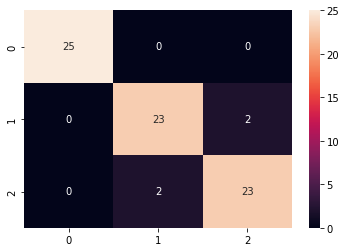

In [49]:
import seaborn as sns
%matplotlib inline

sns.heatmap(confusionMatrix,annot=True)